In [15]:
import SimpleITK as sitk
import os
import pandas as pd
import numpy as np
import time
import sys
import pydicom
import shutil
%matplotlib inline
import matplotlib.pyplot as plt
import ast

In [20]:
paths = [['scans/in', 'scans/out', 'scans/fat', 'scans/water'], 
         ['scans/b50', 'scans/b600', 'scans/b900', 'scans/adc']]
series_numbers = [[1, 2, 3, 4], [5, 6, 7, 8]]
series_descriptions=  [['in', 'out', 'fat', 'water'], ['b50', 'b600', 'b900', 'adc']]
group_descriptions = ['dixon', 'diffusion']

In [21]:
def load_sitk_image_volumes(paths, series_descriptions):
    imgs = []
    readers = []
    print('--- Loading Image Volumes in SimpleITK ---')
    for g, group in enumerate(paths):
        imgs.append([])
        readers.append([])
        for i, path in enumerate(group):
            for dirName, subdirList, fileList in os.walk(path):
                verbose_path = list(set([dirName for filename in fileList if filename.lower().endswith('.dcm')]))
                if len(verbose_path):  # this code is pretty gross but it works
                    print('"' + series_descriptions[g][i] + '"', 'image volume loaded')
                    reader = sitk.ImageSeriesReader()
                    dcm_names = reader.GetGDCMSeriesFileNames(verbose_path[0])
                    reader.SetFileNames(dcm_names)
                    reader.MetaDataDictionaryArrayUpdateOn()
                    reader.LoadPrivateTagsOn()
                    imgs[g].append(reader.Execute())
                    readers[g].append(reader)
    return imgs, readers

In [22]:
imgs, readers = load_sitk_image_volumes(paths, series_descriptions)

--- Loading Image Volumes in SimpleITK ---
"in" image volume loaded
"out" image volume loaded
"fat" image volume loaded
"water" image volume loaded
"b50" image volume loaded
"b600" image volume loaded
"b900" image volume loaded
"adc" image volume loaded


In [75]:
def myshow2(imgs, titles):
    n_col = max([len(group) for group in imgs])
    n_row = len(imgs)
    fig, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    fig.set_dpi(100)
    # fig.set_size_inches(20,6)
    j = 0
    for g, group in enumerate(imgs):
        i = 0
        for img, ax in (zip(group, axs[g])):
            spacing = img.GetSpacing()
            x_space = spacing[0]
            z_space = spacing[2]
            y = int(img.GetHeight()/1.44)
            nda_y = sitk.GetArrayViewFromImage(img)[:,y,:]
            x_size = nda_y.shape[1]
            z_size = nda_y.shape[0]
            extent = (0, x_size*x_space, z_size*z_space, 0)
            ax.set_title(titles[g][i])
            print(j, titles[g][i])
            if j == 4 or j == 5 or j == 6:
                t = ax.imshow(nda_y,extent=extent,interpolation=None, origin='lower', 
                  cmap='Greys_r', vmin=nda_y.min(), vmax=nda_y.max()/4)
            else:
                t = ax.imshow(nda_y,extent=extent,interpolation=None, origin='lower', 
                  cmap='Greys_r', vmin=nda_y.min(), vmax=nda_y.max()/2)
            i += 1
            j += 1
    fig.savefig("scans.pdf", bbox_inches='tight')
    for ax in axs.flatten():
        if not ax.images:
            ax.axis('off')

0 in
1 out
2 fat
3 water
4 b50
5 b600
6 b900
7 adc


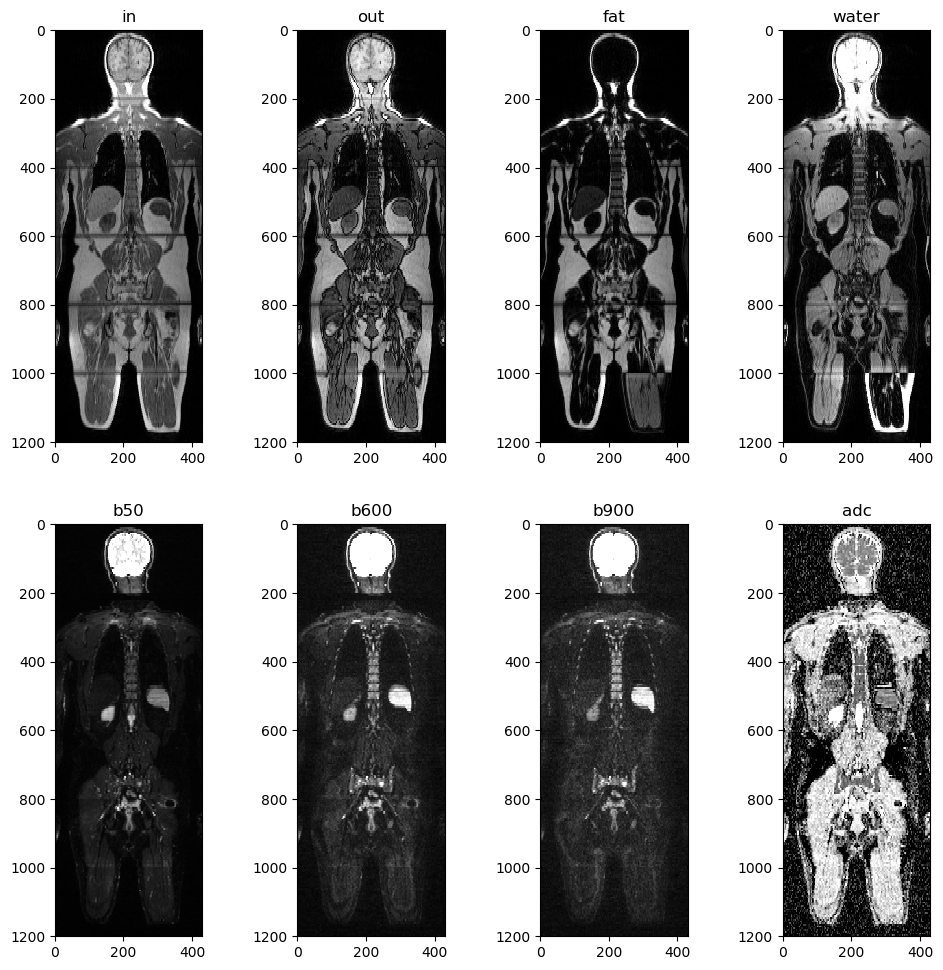

In [76]:
myshow2(imgs, series_descriptions)